In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


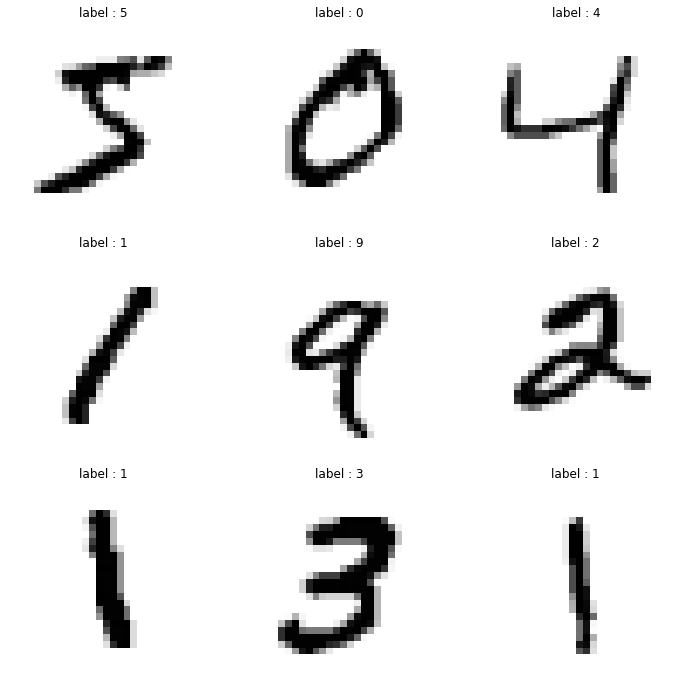

In [6]:
fig, ax = plt.subplots(3, 3, figsize = (12,12))
for i, ax in enumerate(ax.flatten()):
    ax.axis('off')
    ax.set_title(f'label : {y_train[i]}')
    ax.imshow(x_train[i], cmap = 'binary')
plt.show()

In [7]:
inp = tensorflow.keras.layers.Input(shape = (28,28))
x = tensorflow.keras.layers.LSTM(32, activation = "relu")(inp)
outp = tensorflow.keras.layers.Dense(10, activation = "softmax")(x)

model = tf.keras.models.Model(inp, outp)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 32)                7808      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
Total params: 8,138
Trainable params: 8,138
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer  ="adam", loss = "sparse_categorical_crossentropy", metrics = ["acc"])
fitted_model = model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 35s 17ms/step - loss: 0.6078 - acc: 0.7967
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2057 - acc: 0.9382
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1454 - acc: 0.9561
Epoch 4/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1132 - acc: 0.9657
Epoch 5/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0970 - acc: 0.9700
Epoch 6/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0858 - acc: 0.9739
Epoch 7/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0775 - acc: 0.9763
Epoch 8/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0684 - acc: 0.9782
Epoch 9/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0643 - acc: 0.9804
Epoch 10/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0590 - acc: 0.9818
Epoch 11/

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print("(loss, accuracy)")

313/313 [==============================] - 2s 6ms/step - loss: 0.0554 - acc: 0.9861
(loss, accuracy)


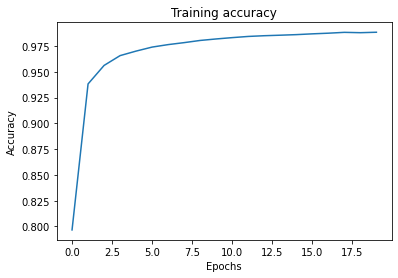

In [10]:
accuracy = fitted_model.history['acc']
epochs = range(0, 20)

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, accuracy)
plt.show()

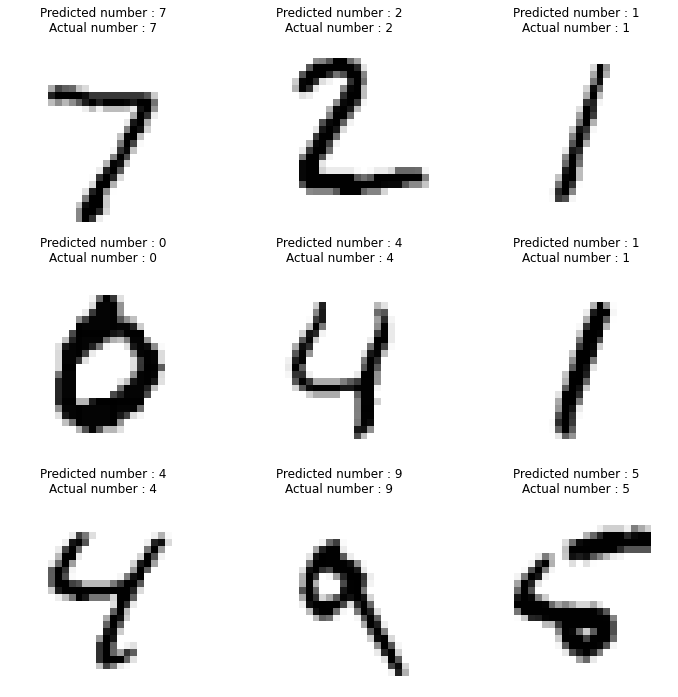

In [11]:
y_pred = model.predict(x_test)

fig, ax = plt.subplots(3, 3, figsize = (12,12))
for i, ax in enumerate(ax.flatten()):
    ax.axis('off')
    ax.set_title(f'Predicted number : {y_pred[i].argmax()}\nActual number : {y_test[i]}')
    ax.imshow(x_test[i], cmap ='binary')
plt.show()